In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torchvision

from dataloading.nvidia import NvidiaDataset, NvidiaSpringTrainDataset, NvidiaTrainDataset, NvidiaValidationDataset
from network import PilotNet
from trainer import Trainer

%load_ext autoreload
%autoreload 2

In [2]:
trainer = Trainer()

In [88]:
root_path = Path("/media/romet/data2/datasets/rally-estonia/dataset")
expert_ds = NvidiaDataset([root_path / '2021-10-26-10-49-06_e2e_rec_ss20_elva'])
expert_back_ds = NvidiaDataset([root_path / '2021-10-26-11-08-59_e2e_rec_ss20_elva_back'])

/media/romet/data2/datasets/rally-estonia/dataset/2021-10-26-10-49-06_e2e_rec_ss20_elva: 33045
/media/romet/data2/datasets/rally-estonia/dataset/2021-10-26-11-08-59_e2e_rec_ss20_elva_back: 33281


/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-12-35-19_e2e_rec_elva_autumn-v3: 30068
{'mae': 0.5022299351301834, 'rmse': 0.6229565146001498, 'max': 1.7146111714230339, 'failure_rate': 12.241000324312637, 'interventions': 19, 'whiteness': 40.575211787612126, 'expert_whiteness': 22.53589576708035}


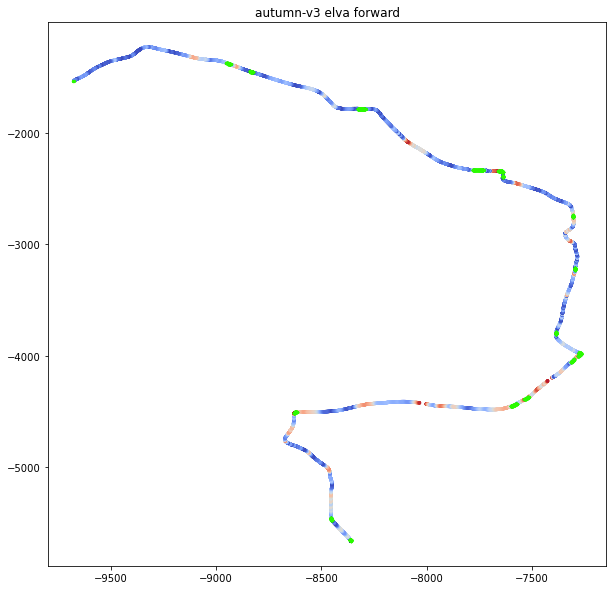

In [47]:
autumn3_ds = NvidiaDataset([root_path / '2021-11-03-12-35-19_e2e_rec_elva_autumn-v3'])
print(trainer.calculate_closed_loop_metrics(autumn3_ds, expert_ds))
draw_error_plot(autumn3_ds, expert_ds, "autumn-v3 elva forward")

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-13-13-16_e2e_rec_elva_wide-v2: 29327
{'mae': 0.4439596328623783, 'rmse': 0.58863071644211, 'max': 1.7262087911760724, 'failure_rate': 11.112763505223631, 'interventions': 19, 'whiteness': 31.61272755020854, 'expert_whiteness': 22.53589576708035}


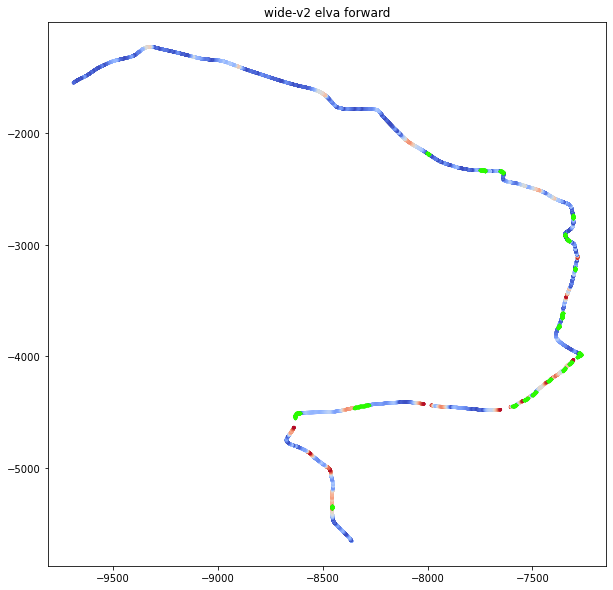

In [48]:
wide2_ds = NvidiaDataset([root_path / '2021-11-03-13-13-16_e2e_rec_elva_wide-v2'])
print(trainer.calculate_closed_loop_metrics(wide2_ds, expert_ds))
draw_error_plot(wide2_ds, expert_ds, "wide-v2 elva forward")

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-15-07-12_e2e_rec_elva_autumn-v3-drive2: 29729
{'mae': 0.45006080667869286, 'rmse': 0.5623108745764405, 'max': 1.7212921799293208, 'failure_rate': 7.595274390243903, 'interventions': 31, 'whiteness': 37.78974669145884, 'expert_whiteness': 22.53589576708035}


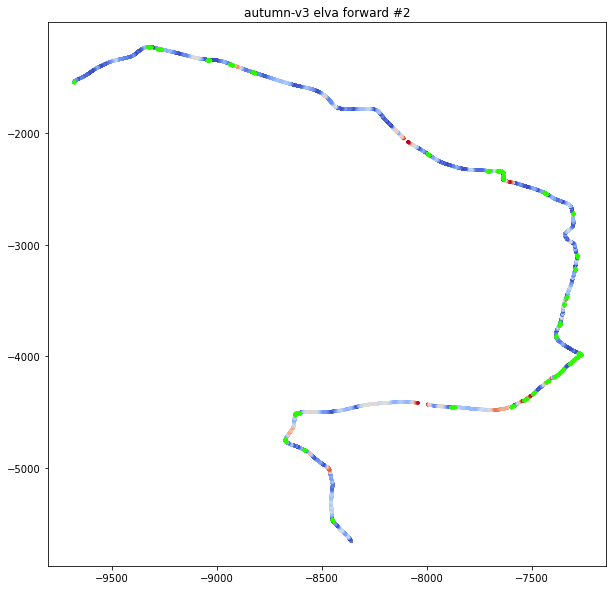

In [49]:
autumn3_2_ds = NvidiaDataset([root_path / '2021-11-03-15-07-12_e2e_rec_elva_autumn-v3-drive2'])
print(trainer.calculate_closed_loop_metrics(autumn3_2_ds, expert_ds))
draw_error_plot(autumn3_2_ds, expert_ds, "autumn-v3 elva forward #2")

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-14-31-14_e2e_rec_elva_autumn-v3-last: 29630
{'mae': 0.4510161266042642, 'rmse': 0.5869686012059684, 'max': 1.7170277771137084, 'failure_rate': 10.650157115068083, 'interventions': 30, 'whiteness': 35.15148736110174, 'expert_whiteness': 22.53589576708035}


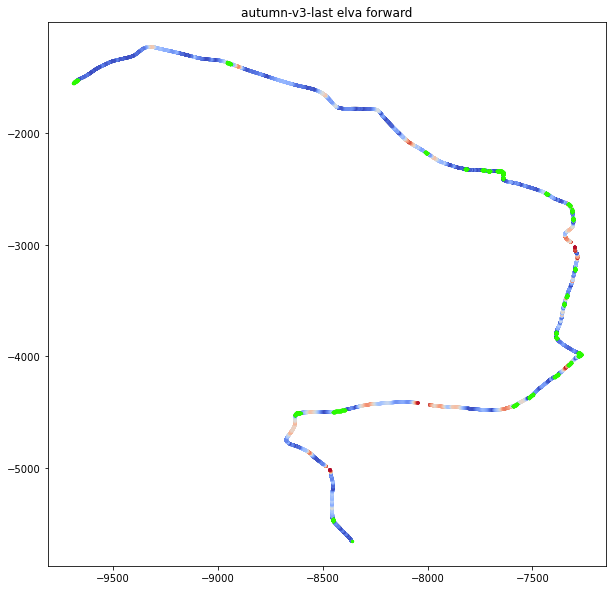

In [51]:
autumn3_last_ds = NvidiaDataset([root_path / '2021-11-03-14-31-14_e2e_rec_elva_autumn-v3-last'])
print(trainer.calculate_closed_loop_metrics(autumn3_last_ds, expert_ds))
draw_error_plot(autumn3_last_ds, expert_ds, "autumn-v3-last elva forward")

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-13-51-53_e2e_rec_elva_autumn-v1: 15142
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-14-02-07_e2e_rec_elva_autumn-v1_continue: 15153
{'mae': 0.5521398672666764, 'rmse': 0.6843119694247056, 'max': 1.7193331423428106, 'failure_rate': 17.456469032400264, 'interventions': 39, 'whiteness': 27.34504496701243, 'expert_whiteness': 22.53589576708035}


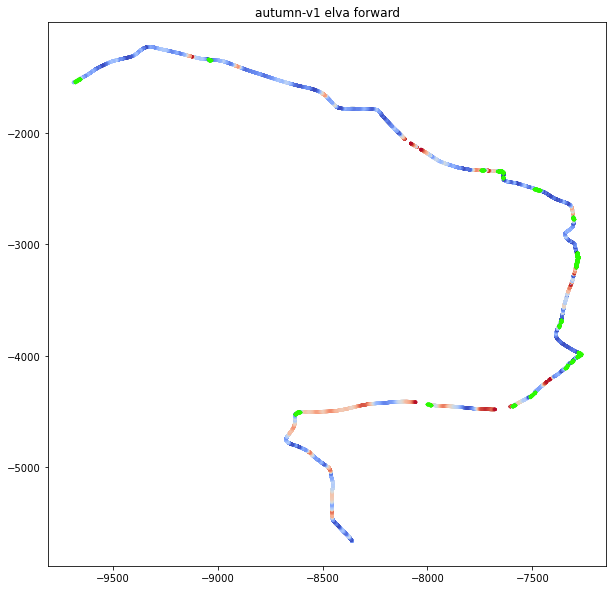

In [52]:
autumn1_ds = NvidiaDataset([root_path / '2021-11-03-13-51-53_e2e_rec_elva_autumn-v1', 
                            root_path / '2021-11-03-14-02-07_e2e_rec_elva_autumn-v1_continue'])
print(trainer.calculate_closed_loop_metrics(autumn1_ds, expert_ds))
draw_error_plot(autumn1_ds, expert_ds, "autumn-v1 elva forward")

In [90]:
datasets = {
        'autumn-v3': NvidiaDataset([root_path / '2021-11-03-12-35-19_e2e_rec_elva_autumn-v3']),
    'wide-v2': NvidiaDataset([root_path / '2021-11-03-13-13-16_e2e_rec_elva_wide-v2']),
    'autumn-v1': NvidiaDataset([root_path / '2021-11-03-13-51-53_e2e_rec_elva_autumn-v1', 
                            root_path / '2021-11-03-14-02-07_e2e_rec_elva_autumn-v1_continue']),
    'autumn-v3-overfit': NvidiaDataset([root_path / '2021-11-03-14-31-14_e2e_rec_elva_autumn-v3-last']),
    'autumn-v3-drive-2': NvidiaDataset([root_path / '2021-11-03-15-07-12_e2e_rec_elva_autumn-v3-drive2'])
}

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-12-35-19_e2e_rec_elva_autumn-v3: 30068
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-13-13-16_e2e_rec_elva_wide-v2: 29327
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-13-51-53_e2e_rec_elva_autumn-v1: 15142
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-14-02-07_e2e_rec_elva_autumn-v1_continue: 15153
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-14-31-14_e2e_rec_elva_autumn-v3-last: 29630
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-15-07-12_e2e_rec_elva_autumn-v3-drive2: 29729


In [91]:
def calculate_metrics(driving_ds, expert_ds):
    metrics_df = pd.DataFrame(columns=["model", "mae", "rmse", "max", "failure_rate", 
                                       "interventions", "whiteness", "expert_whiteness"])

    for name, ds in driving_ds.items():
        metrics = trainer.calculate_closed_loop_metrics(ds, expert_ds)
        metrics['model'] = name
        metrics_df = metrics_df.append(metrics, ignore_index=True)
        
    return metrics_df

In [99]:
metrics = calculate_metrics(datasets, expert_ds)
metrics

,model,mae,rmse,max,failure_rate,interventions,whiteness,expert_whiteness
0,autumn-v3,0.502230,0.622957,1.714611,12.241000,19,40.575212,22.535896
1,wide-v2,0.443960,0.588631,1.726209,11.112764,19,31.612728,22.535896
2,autumn-v1,0.552140,0.684312,1.719333,17.456469,39,27.345045,22.535896
3,autumn-v3-overfit,0.451016,0.586969,1.717028,10.650157,30,35.151487,22.535896
4,autumn-v3-drive-2,0.450061,0.562311,1.721292,7.595274,31,37.789747,22.535896


In [128]:
metrics[metrics.model == "wide-v2"].interventions

1    19
Name: interventions, dtype: object

In [129]:
intervention_adjustments = {
    'autumn-v3': 0, 
    'wide-v2': 0,
    'autumn-v1': 0,
    'autumn-v3-overfit': 0,
    'autumn-v3-drive-2': 0,
}

for name, adj in intervention_adjustments.items():
    metrics[metrics.model == name] = metrics[metrics.model == name].interventions - adj

/home/romet/.conda/envs/lanefollowing/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [136]:
df = NvidiaDataset([root_path / '2021-11-03-13-30-48_e2e_rec_elva_back_wide-v2'])
df

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-13-30-48_e2e_rec_elva_back_wide-v2: 30505


In [130]:
metrics

,model,mae,rmse,max,failure_rate,interventions,whiteness,expert_whiteness
0,autumn-v3,0.502230,0.622957,1.714611,12.241000,19,40.575212,22.535896
1,wide-v2,0.443960,0.588631,1.726209,11.112764,19,31.612728,22.535896
2,autumn-v1,0.552140,0.684312,1.719333,17.456469,39,27.345045,22.535896
3,autumn-v3-overfit,0.451016,0.586969,1.717028,10.650157,30,35.151487,22.535896
4,autumn-v3-drive-2,0.450061,0.562311,1.721292,7.595274,31,37.789747,22.535896


In [86]:
datasets_backwards = {
    'autumn-v3': NvidiaDataset([root_path / '2021-11-03-12-53-38_e2e_rec_elva_back_autumn-v3']),
    'wide-v2': NvidiaDataset([root_path / '2021-11-03-13-30-48_e2e_rec_elva_back_wide-v2']),
    'autumn-v1': NvidiaDataset([root_path / '2021-11-03-14-12-10_e2e_rec_elva_back_autumn-v1']),
    'autumn-v3-overfit': NvidiaDataset([root_path / '2021-11-03-14-48-21_e2e_rec_elva_back_autumn-v3-last']),
    'autumn-v3-drive-2': NvidiaDataset([root_path / '2021-11-03-15-25-36_e2e_rec_elva_back_autumn-v3-drive2'])
}

/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-12-53-38_e2e_rec_elva_back_autumn-v3: 30471
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-13-30-48_e2e_rec_elva_back_wide-v2: 30505
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-14-12-10_e2e_rec_elva_back_autumn-v1: 30376
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-14-48-21_e2e_rec_elva_back_autumn-v3-last: 30747
/media/romet/data2/datasets/rally-estonia/dataset/2021-11-03-15-25-36_e2e_rec_elva_back_autumn-v3-drive2: 30382


In [89]:
metrics_backwards = calculate_metrics(datasets_backwards, expert_back_ds)
metrics_backwards

,model,mae,rmse,max,failure_rate,interventions,whiteness,expert_whiteness
0,autumn-v3,0.516410,0.650548,1.721210,11.159653,13,27.871334,24.159325
1,wide-v2,0.476433,0.619278,1.719881,10.728426,13,29.357156,24.159325
2,autumn-v1,0.551390,0.677234,1.718249,12.491294,11,26.772094,24.159325
3,autumn-v3-overfit,0.500938,0.620764,1.715706,11.452504,23,34.136939,24.159325
4,autumn-v3-drive-2,0.444941,0.556454,1.720779,7.264722,23,32.510528,24.159325


In [104]:
def draw_error_plot(model_ds, expert_ds, title=None):
    plt.figure(figsize=(10, 10))
    
    lat_errors = trainer.calculate_lateral_errors(model_ds, expert_ds, only_autonomous=True)
    positions_df = model_ds.frames
    
    autonomous_df = positions_df[positions_df.autonomous].reset_index(drop=True)
    plt.scatter(autonomous_df["position_x"], autonomous_df["position_y"],
               s=5,
               c=lat_errors, cmap=plt.cm.coolwarm)
    
    interventions_df = positions_df[positions_df.autonomous == False].reset_index(drop=True)
    plt.scatter(interventions_df["position_x"], interventions_df["position_y"],
                s=5,
                c="#2BFA00")
    
    if title:
        plt.title(title)


In [133]:
def draw_error_plot(ax, model_ds, expert_ds, title=None):
    lat_errors = trainer.calculate_lateral_errors(model_ds, expert_ds, only_autonomous=True)
    positions_df = model_ds.frames
    
    autonomous_df = positions_df[positions_df.autonomous].reset_index(drop=True)
    ax.scatter(autonomous_df["position_x"], autonomous_df["position_y"],
               s=5,
               c=lat_errors, cmap=plt.cm.coolwarm)
    
    interventions_df = positions_df[positions_df.autonomous == False].reset_index(drop=True)
    ax.scatter(interventions_df["position_x"], interventions_df["position_y"],
                s=5,
                c="#2BFA00")
    
    if title:
        ax.set_title(title)


0 autumn-v3
1 wide-v2
2 autumn-v1
3 autumn-v3-overfit
4 autumn-v3-drive-2
0 autumn-v3
1 wide-v2
2 autumn-v1
3 autumn-v3-overfit
4 autumn-v3-drive-2


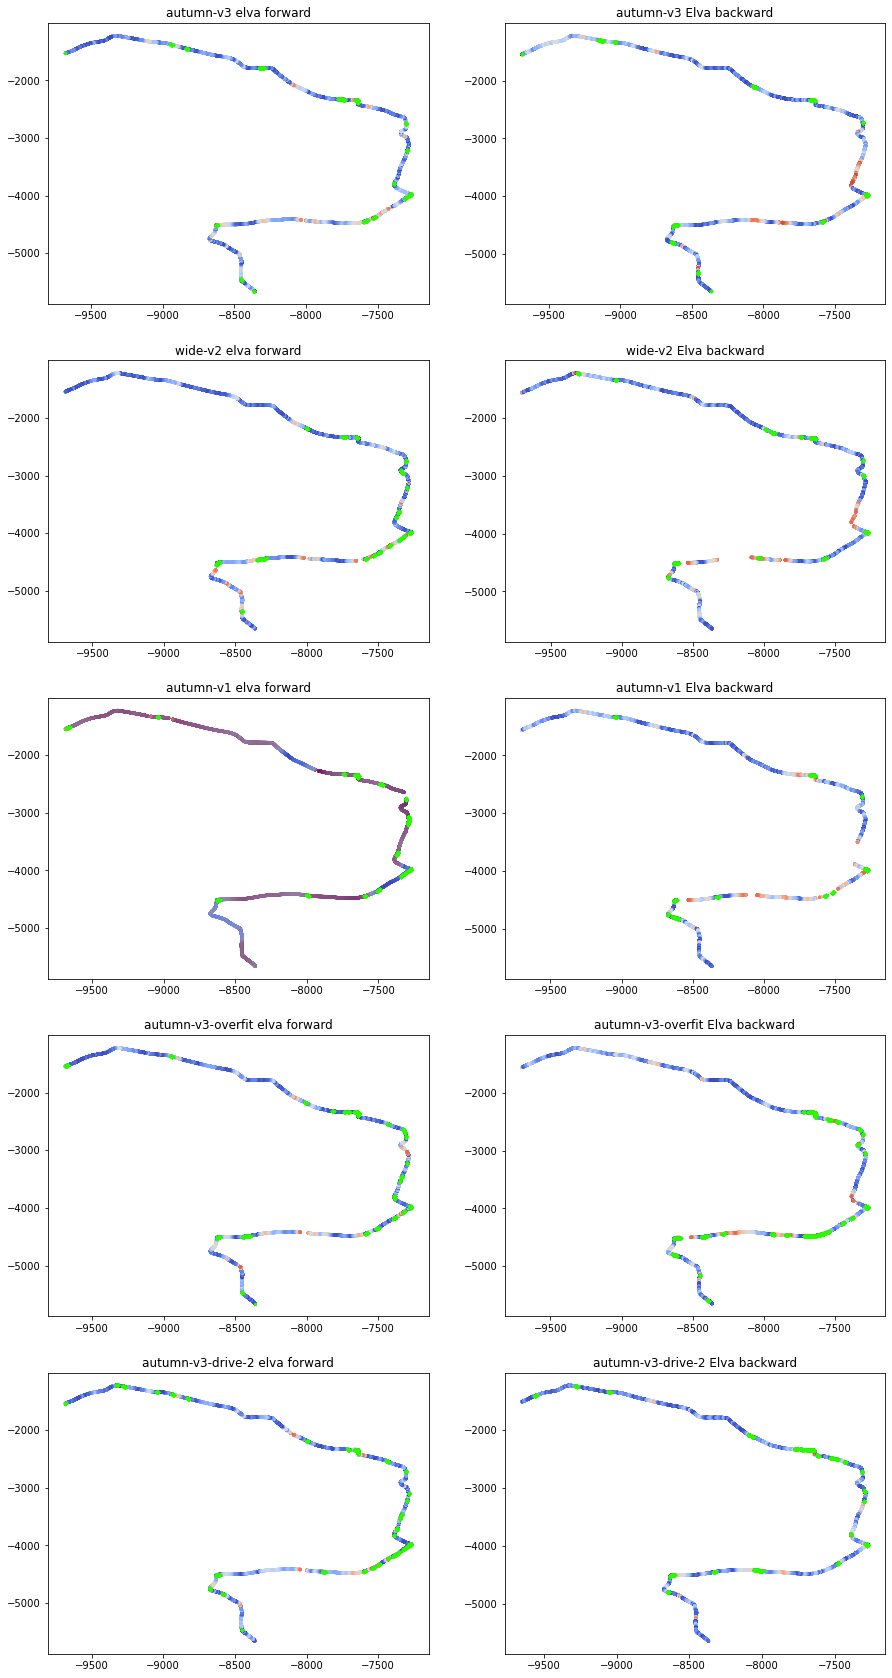

In [134]:
fig, ax = plt.subplots(5, 2, figsize=(15, 30))

for i, (name, ds) in enumerate(datasets.items()): 
    print(i, name)
    draw_error_plot(ax[i][0], ds, expert_ds, f"{name} elva forward")
    
for i, (name, ds) in enumerate(datasets_backwards.items()): 
    print(i, name)
    draw_error_plot(ax[i][1], ds, expert_back_ds, f"{name} Elva backward")

In [121]:
fig.savefig("elva-2021-11-03.png", facecolor="white")